<a href="https://colab.research.google.com/github/whatnews72/----/blob/master/02_%EC%84%B1%EB%B3%84%EC%9D%84_%EB%B6%84%EB%A5%98%ED%95%98%EB%8B%A4_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **성별을 분류하다**

---

머신러닝으로 성별을 분류하는 인공지능 모델을 만들어 봅니다.

> ### 1. 문제정의  
  - 문제 상황 이해하기  
  - 해결할 문제: 이목구비 크기로 성별 분류
  
> ### 2. 데이터 불러오기  
  - 캐글(kaggle)에서 이목구비 데이터 셋 불러오기  
  - https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset

> ### 3. 데이터 탐색 및 전처리하기  
  - 데이터 속성 살펴보기(데이터 유형, 결측치, 속성명 등)  
  - 데이터 시각화하기(성별 분류에 영향을 미치는 속성 탐색)  
  - 범주형 속성값을 수치형으로 변환하기(원-핫 인코딩)  
  - 속성 간 상관관계 분석하기(속성 간의 관계를 히트맵으로 시각화)  
  - 훈련 데이터와 테스트 데이터 나누기

> ### 4. 모델 생성하기  
  - 로지스틱 회귀 모델 생성하기

> ### 5. 모델 학습하기  
  - 모델 학습하기(훈련 데이터 사용)  

> ### 6. 모델 평가 및 예측하기  
  - 성능 평가하기(테스트 데이터 사용)  
  - 성별 예측하기(새로운 데이터 사용)  

### **1. 라이브러리 불러오기**

* 판다스  
* 맷플롯립  
* 시본  
* 사이킷런 : model_selection, linear_model, metrics
* 넘파이

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score              #scikit-learn의 분류 성능평가(sklearn.metrics)에서 정확도(accuracy_score)
import numpy as np

### **2. 코랩과 구글 드라이브 연동하기**

실행후, 왼쪽 파일 아이콘을 클릭하면, drive폴더가 loading된것을 확인합니다.

In [ ]:
# 코랩과 구글 드라이브 연동하기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **3. 파일 읽어오기**  
---
#### **데이터프레임 객체 = 판다스 객체.read_csv('파일명.csv')**  
---
판다스 라이브러리의 read_csv() 함수를 사용하여 csv 형식의 파일을 코랩으로 읽어 들임.

In [ ]:
# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/colab/gender_classification_v7.csv')
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


### **4. 데이터 기초정보 확인하기**  
---
#### **데이터프레임 객체.info()**
---
info( ) 메소드를 통해 데이터 개수, 속성 개수, 속성명, 결측치, 속성의 데이터 타입 등 확인

In [ ]:
# 데이터 정보 살펴보기
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


### **5. 데이터 살펴보기**
---
#### **데이터프레임 객체.head(확인할 데이터 개수)**
---
head( ) 메소드를 통해 데이터 상단의 일부 데이터 확인  
head( )의 괄호 안에 숫자를 입력하지 않으면 기본값인 5로 설정되어 0~4행의 데이터가 출력

In [ ]:
# 상위 5개 데이터 살펴보기
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


### **6. 데이터 통계치 살펴보기**  
---
#### **데이터프레임 객체.describe()**  
---
describe( ) 메소드를 통해 데이터 개수, 평균, 표준편차, 최솟값, 최댓값, 4분위수 파악  

In [ ]:
# 데이터 통계치 살펴보기
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


### **7. 데이터 시각화하기:성별 분포 확인하기**  
---
#### **데이터프레임 객체['속성명'].value_counts()**
---
속성명에 포함된 각 고윳값의 개수 출력

<Axes: >

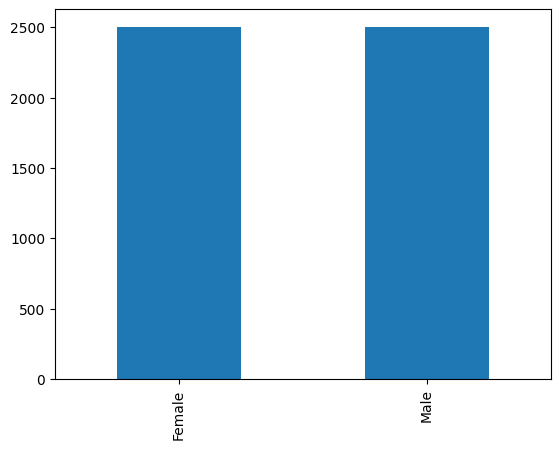

In [ ]:
# 데이터 시각화1: 성별 인원 수 비교하기
df['gender'].value_counts( )
df['gender'].value_counts( ).plot.bar( )

### **8. 데이터 시각화 : 성별 간 머리카락 길이 비교하기**  
---
#### **데이터프레임 객체['속성명1'].groupby(데이터프레임 객체['속성명2'])**  
속성명2의 고윳값을 기준으로 속성명1을 그룹화  
예) df['long_hair'].groupby(df['gender'])'는 gender값인 male, female 2개의 그룹으로 long_hair를 분류함.  

---
#### **데이터프레임 객체['속성명']. mean( ). round(반올림할 자릿수)**   
반올림할 자릿수가 0이면 가까운 정수로 반올림하며, 양수이면 소수점 아래 자릿수로 반올림  

---
#### **plt.text(x축 위치, y축 위치, 출력할 내용)**  
그래프의 (x, y) 위치에 ‘출력할 내용’ 출력  

---

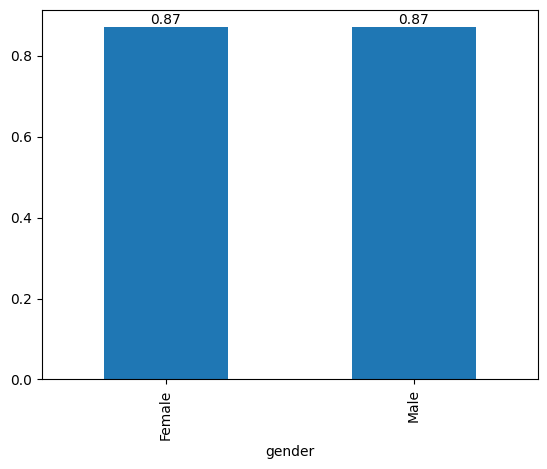

In [ ]:
# 데이터 시각화2: 성별(gender) 머리카락 길이(long_hair) 평균 그래프 그리기
long_hair_count = df['long_hair'].groupby(df['gender']).mean().round(2)
long_hair_count # long_hair_count의 내용 출력

long_hair_count.plot.bar( )
plt.text(0, long_hair_count[0] + 0.02, long_hair_count[0], va = 'center', ha = 'center')
plt.text(1, long_hair_count[1] + 0.02, long_hair_count[1], va = 'center', ha = 'center')
plt.show( )

### **9. 원-핫 인코딩하기**  

상관관계(correlation) 분석을 통해 성별(gender)속성과 관련이 깊은 속성을 찾아본다.  

**원-핫 인코딩** : 범주의 개수만큼 속성을 만들고 범주마다 0이나 1을 입력하는 방법.  
1개의 속성만 1로 표기하고 나머지 속성에는 0을 표기한다고 해서 ‘원-핫(one-hot)’이라는 이름이 붙음.  


---
#### **판다스 객체.get_dummies(데이터프레임 객체, columns = ['인코딩할 속성명'], drop_first = True)**  

columns을 명시하지 않으면 데이터프레임의 모든 범주형 데이터를 원-핫 인코딩 처리함.  
특정 속성만 원-핫 인코딩하려면 columns에 속성명 제시(생략 가능)  
drop_first = True를 추가하면 원-핫 인코딩을 수행하여 생성된 새로운 속성 중 첫 번째 속성 삭제(생략 가능)  

---

In [ ]:
# 원-핫 인코딩하기(범주형 데이터인 속성 'gender'를 수치형 데이터로 변환)
df_onehot = pd.get_dummies(df, columns = ['gender'],drop_first=True)
df_onehot

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender_Male
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


### **10. 상관관계 분석**  

---
#### **데이터프레임 객체.corr( )**  
---
상관관계(correlation) 분석

In [ ]:
# 데이터 속성 간 상관관계 분석하기
corr = df_onehot.corr().round(2)
corr

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender_Male
long_hair,1.00,-0.01,-0.02,0.00,0.01,0.01,-0.03,-0.01
forehead_width_cm,-0.01,1.00,0.09,0.25,0.26,0.26,0.25,0.33
forehead_height_cm,-0.02,0.09,1.00,0.21,0.19,0.21,0.22,0.28
nose_wide,0.00,0.25,0.21,1.00,0.57,0.56,0.57,0.76
nose_long,0.01,0.26,0.19,0.57,1.00,0.56,0.56,0.74
lips_thin,0.01,0.26,0.21,0.56,0.56,1.00,0.57,0.74
distance_nose_to_lip_long,-0.03,0.25,0.22,0.57,0.56,0.57,1.00,0.75
gender_Male,-0.01,0.33,0.28,0.76,0.74,0.74,0.75,1.00


### **11. 히트맵으로 표현**

히트맵 : 색(heat, 열)으로 배열(map, 지도)을 나타내는 그래프  

---  
#### **시본 객체.heatmap(데이터프레임명, annot = True)**
---  
annot = True는 히트맵의 각 셀에 해당하는 값을 셀에 표기

![히트맵](https://blog.kakaocdn.net/dn/UuDzf/btqBGroa8pC/B2oCF0EbxaGv2DRB56oJy0/img.png)

<Axes: >

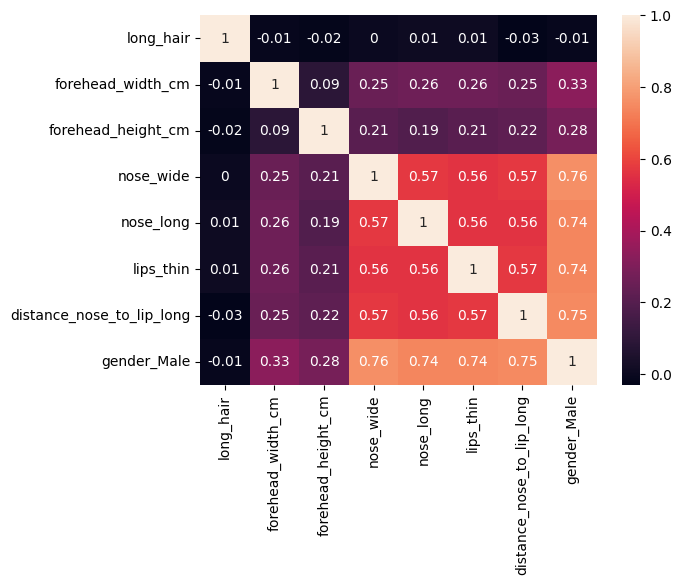

In [ ]:
import seaborn as sns

# 상관관계 히트맵 그리기
sns.heatmap(corr, annot = True)

### **12. 독립 변수와 종속 변수 설정하기**  

* 독립변수 : 영향을 미치는 속성
* 종속변수 : 독립변수의 영향을 받는 속성

---  
독립 변수 객체 = 데이터프레임 객체[[속성명1, 속성명2, …]]  
종속 변수 객체 = 데이터프레임 객체[속성명]  

---

In [ ]:
# 독립 변수와 종속 변수 설정하기
x = df_onehot[['forehead_width_cm', 'forehead_height_cm', 'nose_wide',
              'nose_long', 'lips_thin', 'distance_nose_to_lip_long']] # 독립 변수
y = df_onehot['gender_Male'] # 종속 변수
display(x)
display(y)

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,11.8,6.1,1,0,1,1
1,14.0,5.4,0,0,1,0
2,11.8,6.3,1,1,1,1
3,14.4,6.1,0,1,1,1
4,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...
4996,13.6,5.1,0,0,0,0
4997,11.9,5.4,0,0,0,0
4998,12.9,5.7,0,0,0,0
4999,13.2,6.2,0,0,0,0


0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender_Male, Length: 5001, dtype: uint8

### **13. 훈련 데이터와 테스트 데이터 나누기**  

사이킷런(scikit-learn)의 model_selection 모듈에서 train_test_split 사용  

---
#### **학습에 사용할 독립 변수 객체, 테스트에 사용할 독립 변수 객체, 학습에 사용할 종속 변수 객체, 테스트에 사용할 종속 변수 객체 = train_test_split (독립 변수, 종속 변수, test_size = 테스트 데이터 비율)**
---
독립 변수: 영향을 미치는 속성  
종속 변수: 영향을 받는 속성  
테스트 데이터 비율: 실수 형태로 나타내며, 예를 들어 0.3을 입력한다면
전체 데이터의 30%를 테스트 데이터로 배정하겠다는 의미, test_size를 생략하면 기본 값 0.25로 설정  

*train_test_split*( )은 실행될 때마다 데이터를 매번 임의로 하여 훈련 데이터와 테스트 데이터를 새롭게 구성

![train_test_split](https://cdn-coiao.nitrocdn.com/CYHudqJZsSxQpAPzLkHFOkuzFKDpEHGF/assets/static/optimized/rev-85bf93c/wp-content/uploads/2022/05/train-test-split_simple-visual-example_v2.png)

In [ ]:
# 훈련 데이터와 테스트 데이터로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((3500, 6), (1501, 6), (3500,), (1501,))

### **13. 모델 생성하기**  

사이킷런의 로지스틱 회귀 모델 사용해보기  

사이킷런(scikit-learn)의 linear_model 모듈에서 LogisticRegression 사용

![Linear Regression vs. Logistic Regression](https://tutorialforbeginner.com/images/tutorial/linear-regression-vs-logistic-regression.png)



In [ ]:
# 모델 생성하기
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression() # 로지스틱 회귀 분류 모델 생성

### **14. 모델 학습하기**

---
#### **모델 객체.fit(훈련 데이터, 훈련 데이터의 레이블)**  
---
훈련 데이터와 훈련 데이터의 레이블은 값만 학습하기 위해 '.values'와 함께 제시

In [ ]:
# 모델 학습하기
LR_model.fit(X_train.values, Y_train.values)

LogisticRegression()

### **15. 모델 평가하기**  

---  
#### **모델 객체.predict(테스트 데이터)**  
테스트 데이터를 이용하여 학습이 잘되었는지 평가  

---
#### **accuracy_score(테스트 데이터의 레이블, 테스트 데이터 예측값)**  
테스트 데이터의 레이블(실젯값)과 테스트 데이터의 예측값을 비교하여 모델의 정확도 산출  

---


In [ ]:
# 모델 평가하기
predict_results = LR_model.predict(X_test.values)
predict_results

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [ ]:
# 실젯값의 테스트 데이터로 결과 예측하기
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predict_results) # 모델의 정확도 산출하기

0.9726848767488341

### **16. 성별 예측하기**

---  
#### **모델 객체.predict_proba(새로운 데이터)**  
---  
새로운 데이터에 대한 예측 결과가 레이블에 속할 확률 출력  
넘파이 라이브러리를 불러와 새로운 데이터를 배열로 제시  

•이마 너비: 16.3  
•이마 높이: 6.0  
•코 너비: 0(좁음.)  
•코 길이: 0(짧음.)  
•입술 두께: 0(얇음.)  
•인중 길이: 0(짧음.)  

In [ ]:
import numpy as np
# 새로운 데이터의 범주 예측하기
choi = np.array([[16.3, 6.0, 0.8, 0.8, 0, 0]]) #이마 너비, 이마 높이, 코 너비, 코 길이, 입술 두께, 인중 길이
LR_model.predict_proba(choi) # 새로운 데이터가 각 범주에 해당될 확률이 얼마나 되는지 출력하기

array([[0.25568734, 0.74431266]])

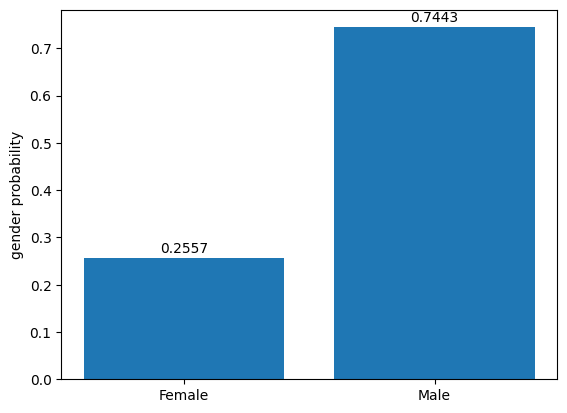

In [ ]:
# 새로운 데이터가 각 범주에 해당될 확률이 얼마나 되는지 출력하기
probs = LR_model.predict_proba(choi)
labels = ['Female', 'Male']
probs_len = len(probs[0])

plt.bar(range(probs_len), probs[0])
plt.xticks(range(probs_len), labels)
plt.text(0, probs[0][0] + 0.02, probs[0][0].round(4), va = 'center', ha = 'center')
plt.text(1, probs[0][1] + 0.02, probs[0][1].round(4), va = 'center', ha = 'center')

plt.ylabel('gender probability')
plt.show()